In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import datetime
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
from itertools import chain
import json
import os
import pandas as pd

In [3]:
# Fetch the service account key JSON file contents
cred = credentials.Certificate(os.path.join(
    "firebase-credentials",
    [
        key for key in os.listdir(
            'firebase-credentials'
        ) if (
            "tingle-pilot-collected-data-firebase-adminsdk" in key
        ) and key.endswith(
            ".json"
        )
    ][0]
))

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://tingle-pilot-collected-data.firebaseio.com/'
})

In [52]:
samples = db.reference('samples').get()
batches = {
    k: v for d in [
        samples[key] for key in samples
    ] for k, v in d.items()
}
data = pd.DataFrame(
    list(
        chain.from_iterable(
            [
                batches[
                    batch
                ][
                    'batchedData'
                ] for batch in batches
            ]
        )
    )
)
data["human-readable timestamp"] = pd.to_datetime(
    data["timestamp"]*1000000
)

In [53]:
data

,distance,hand,ontarget,pitch,roll,step,target,thermopile1,thermopile2,thermopile3,thermopile4,timestamp,human-readable timestamp
0,0.0,R,False,208.0,202.0,NULL999,none,78.9,82.5,79.1,80.0,1518123012595,2018-02-08 20:50:12.595
1,0.0,R,False,177.0,220.0,NULL999,none,79.3,80.1,78.9,79.1,1518123012721,2018-02-08 20:50:12.721
2,0.0,R,False,147.0,253.0,NULL999,none,78.6,79.9,78.1,79.5,1518123012921,2018-02-08 20:50:12.921
3,0.0,R,False,95.0,80.0,NULL999,none,78.4,79.9,78.0,79.1,1518123013121,2018-02-08 20:50:13.121
4,0.0,R,False,100.0,51.0,NULL999,none,78.4,80.0,78.0,79.3,1518123013321,2018-02-08 20:50:13.321
5,0.0,R,False,95.0,46.0,NULL999,none,78.5,80.0,78.1,79.1,1518123013521,2018-02-08 20:50:13.521
6,0.0,R,False,99.0,51.0,NULL999,none,78.5,80.0,78.0,79.4,1518123013721,2018-02-08 20:50:13.721
7,0.0,R,False,98.0,78.0,NULL999,none,77.9,80.0,78.9,79.1,1518123013794,2018-02-08 20:50:13.794
8,0.0,R,False,98.0,65.0,NULL999,none,78.3,80.1,78.0,79.1,1518123013995,2018-02-08 20:50:13.995
9,0.0,R,False,98.0,60.0,NULL999,none,78.3,80.0,78.0,79.3,1518123014195,2018-02-08 20:50:14.195


In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

In [66]:
y = pd.DataFrame([
    data["thermopile1"].astype(float),
    data["thermopile2"].astype(float),
    data["thermopile3"].astype(float),
    data["thermopile4"].astype(float)
]).T
y.index = data["human-readable timestamp"]

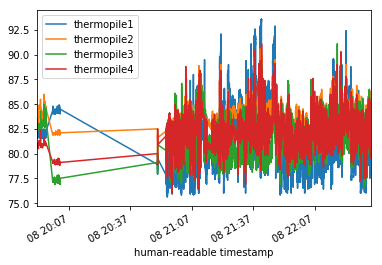

In [67]:
y.plot()
plt.show()

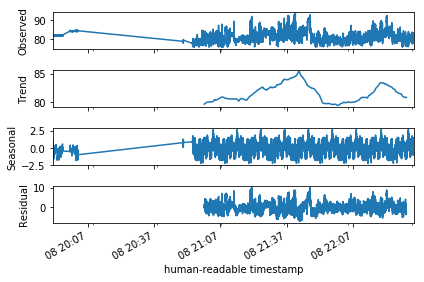

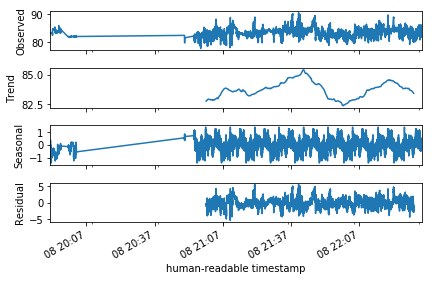

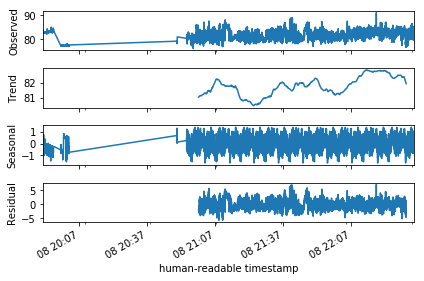

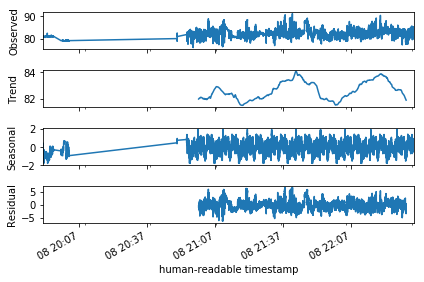

In [85]:
for col in y.columns:
    decomposition = sm.tsa.seasonal_decompose(
        y[col],
        model='additive',
        freq=3600
    )
    decomposition.plot()
plt.show()

---

In [ ]:
%load_ext Cython

In [ ]:
%%cython --annotate

cdef extern from "gesture-recognition-project/software/firmware/nrf52_X9_TRICH3/neural_networks_LHAND_LHEAD.h":
    
    float nn_lefthand_lefthead_5521(float t1, float t2, float t3, float  t4, float distance)
    
    float nn_lefthand_lefthead_7521(float t1, float t2, float t3, float  t4, float distance, float pitch, float roll)

In [ ]:
import sys
sys.path